# Pymaceuticals Inc.
---

### Analysis


- Analysis starts here

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete_df = pd.merge(study_results, mouse_metadata, how = "outer", on = "Mouse ID")

# Display the data table for preview
mouse_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_complete_df["Mouse ID"].value_counts())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
dups = mouse_complete_df[mouse_complete_df.duplicated(["Mouse ID", "Timepoint"], keep = False)]
dups_id = dups["Mouse ID"].unique()
dups_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_complete_df.loc[mouse_complete_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_complete_df.loc[mouse_complete_df["Mouse ID"] != "g989"]
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(clean_mouse_df["Mouse ID"].value_counts())
clean_count

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_table_df = clean_mouse_df[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).mean().rename(columns = {"Tumor Volume (mm3)" : "Mean Tumor Volume"})
summary_table_df["Median Tumor Volume"] = clean_mouse_df[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).median()
summary_table_df["Tumor Volume Variance"] = clean_mouse_df[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).var()
summary_table_df["Tumor Volume Std. Dev."] = clean_mouse_df[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).std()
summary_table_df["Tumor Volume Std. Err."] = clean_mouse_df[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).sem()
summary_table_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_summary = clean_mouse_df[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", 
                                                                                                   "std", "sem"])
new_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

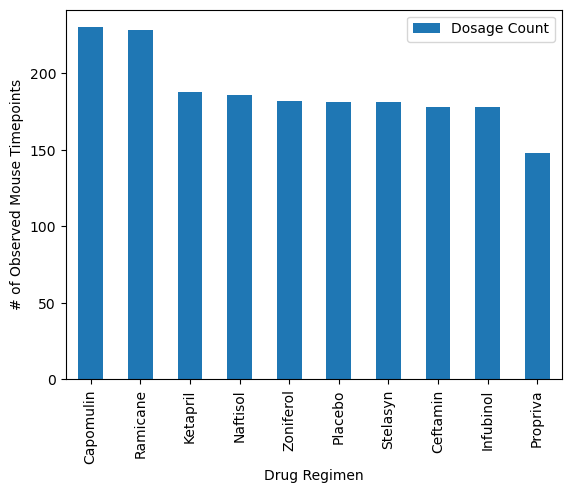

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dosage_count = clean_mouse_df.groupby(["Drug Regimen"]).size()
dosage_data = pd.DataFrame(data = {"Dosage Count": dosage_count}).sort_values(by = "Dosage Count", ascending = False)
pandaplot = dosage_data.plot.bar()
pandaplot.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

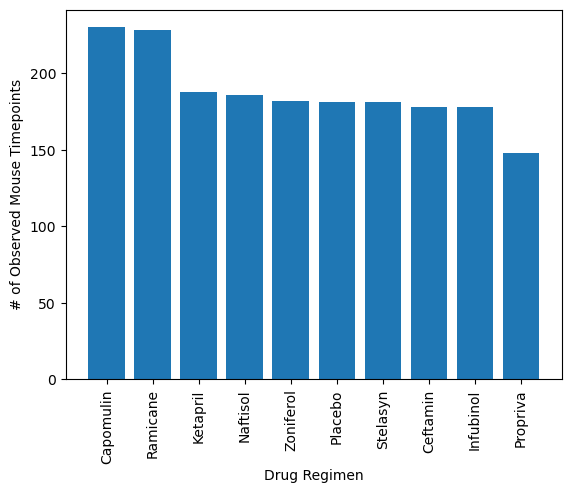

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugplot = plt.bar(dosage_data.index, dosage_data["Dosage Count"])
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

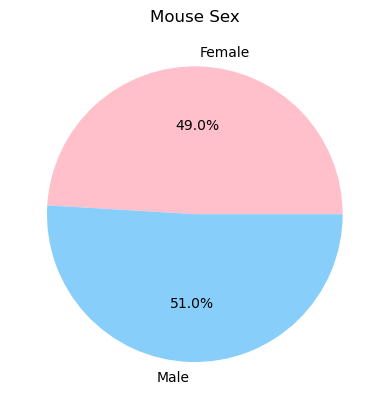

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_fm = clean_mouse_df.groupby(["Sex"]).size()
panda_pie = count_fm.plot(kind = "pie", title = "Mouse Sex", autopct="%1.1f%%", colors = ["pink", "lightskyblue"])

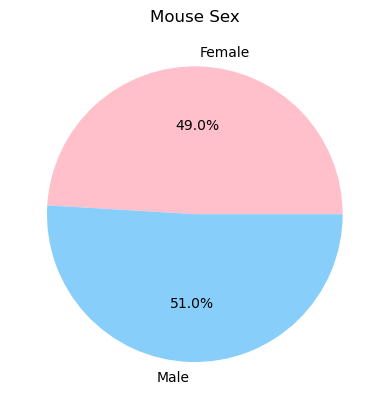

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Mouse Sex")
gender_pie = plt.pie(count_fm, labels = count_fm.index, autopct="%1.1f%%", colors = ["pink", "lightskyblue"])

# Quartiles, Outliers, and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_max = clean_mouse_df[["Mouse ID", "Timepoint"]].groupby(["Mouse ID"]).max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = pd.merge(time_max, clean_mouse_df, how = "inner", on = ["Mouse ID", "Timepoint"])
final_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
chosen_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliers = []
for x in range(len(chosen_treatments)):
        tumor_vol_data.append([])
        outliers.append([])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# iterrows formatting pulled from https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-pandas-dataframe
for index, row in final_volume.iterrows():
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for x in range(len(chosen_treatments)):
        if row["Drug Regimen"] == chosen_treatments[x]:
            
    # add subset         
            tumor_vol_data[x].append(row["Tumor Volume (mm3)"])
        
    # Determine outliers using upper and lower bounds
lowerq = []
upperq = []
iqr = []
upperbound = []
lowerbound = []

tumor_vol_df = pd.DataFrame({f"{chosen_treatments[0]}": tumor_vol_data[0]})

for x in range(len(chosen_treatments)):
    tumor_vol_df[f"{chosen_treatments[x]}"] = tumor_vol_data[x]
    lowerq.append(tumor_vol_df[f"{chosen_treatments[x]}"].quantile(0.25))
    upperq.append(tumor_vol_df[f"{chosen_treatments[x]}"].quantile(0.75))
    iqr.append(upperq[x]-lowerq[x])
    upperbound.append(upperq[x] + 1.5*iqr[x])
    lowerbound.append(lowerq[x] - 1.5*iqr[x])
    
for index, row in final_volume.iterrows():
    for x in range(len(chosen_treatments)):
        if row["Drug Regimen"] == chosen_treatments[x]:
            if row["Tumor Volume (mm3)"] <= lowerbound[x] or row["Tumor Volume (mm3)"] >= upperbound[x]:
                outliers[x].append(row["Tumor Volume (mm3)"])

for x in range(len(chosen_treatments)):
    print(f"{chosen_treatments[x]} potential outliers: {outliers[x]}")

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


Text(0, 0.5, 'Final Tumor Volume (mm3)')

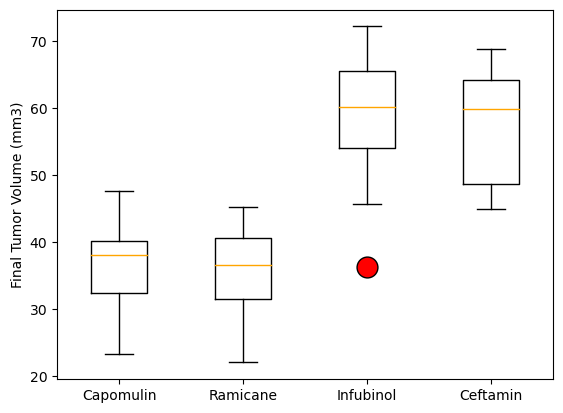

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
bp = tumor_vol_df.plot(kind = "box", flierprops = {"markersize": 15, "markerfacecolor": "r"},
                       color = dict(boxes = "black", whiskers = "black", medians = "orange", caps = "black"))
plt.ylabel("Final Tumor Volume (mm3)")

In [22]:
# Find mice treated with Capomulin
capomulin_full = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
capomulin_full["Mouse ID"].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_u364 = capomulin_full.loc[capomulin_full["Mouse ID"] == "u364"]
mouse_u364

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1745,u364,0,45.000000,0,Capomulin,Male,18,17
1746,u364,5,45.760886,1,Capomulin,Male,18,17
1747,u364,10,46.568417,2,Capomulin,Male,18,17
1748,u364,15,47.212200,2,Capomulin,Male,18,17
1749,u364,20,40.343948,2,Capomulin,Male,18,17
1750,u364,25,35.503616,2,Capomulin,Male,18,17
1751,u364,30,35.978334,2,Capomulin,Male,18,17
1752,u364,35,35.459490,2,Capomulin,Male,18,17
1753,u364,40,36.024138,2,Capomulin,Male,18,17
1754,u364,45,31.023923,3,Capomulin,Male,18,17
